<a href="https://colab.research.google.com/github/kaz-taka-1/2-02_tag/blob/main/4%E7%AB%A0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
# 下記セルを実行すると、authorization codeの入力を求められます。
# 出力されたリンク先をクリックし、Googleアカウントにログインし、
# authorization codeをコピーし、貼り付けをおこなってください。
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
import os 
project = '100knock-process-visualization'
chapter = 4
os.chdir(f'/content/drive/MyDrive/{project}/chapter-{chapter}/')

# ４章 言語データの加工・可視化を行う１０本ノック

## ノック５１：テキストファイルを読み込もう

In [8]:
ls data/

hashire_merosu.txt  stop_words.txt


In [9]:
with open('data/hashire_merosu.txt',mode='r',encoding='shift-jis') as f:content = f.read()
print(content)

走れメロス
太宰治

-------------------------------------------------------
【テキスト中に現れる記号について】

《》：ルビ
（例）邪智暴虐《じゃちぼうぎゃく》

｜：ルビの付く文字列の始まりを特定する記号
（例）疲労｜困憊《こんぱい》

［＃］：入力者注　主に外字の説明や、傍点の位置の指定
（例）［＃地から１字上げ］
-------------------------------------------------------

　メロスは激怒した。必ず、かの邪智暴虐《じゃちぼうぎゃく》の王を除かなければならぬと決意した。メロスには政治がわからぬ。メロスは、村の牧人である。笛を吹き、羊と遊んで暮して来た。けれども邪悪に対しては、人一倍に敏感であった。きょう未明メロスは村を出発し、野を越え山越え、十里はなれた此《こ》のシラクスの市にやって来た。メロスには父も、母も無い。女房も無い。十六の、内気な妹と二人暮しだ。この妹は、村の或る律気な一牧人を、近々、花婿《はなむこ》として迎える事になっていた。結婚式も間近かなのである。メロスは、それゆえ、花嫁の衣裳やら祝宴の御馳走やらを買いに、はるばる市にやって来たのだ。先ず、その品々を買い集め、それから都の大路をぶらぶら歩いた。メロスには竹馬の友があった。セリヌンティウスである。今は此のシラクスの市で、石工をしている。その友を、これから訪ねてみるつもりなのだ。久しく逢わなかったのだから、訪ねて行くのが楽しみである。歩いているうちにメロスは、まちの様子を怪しく思った。ひっそりしている。もう既に日も落ちて、まちの暗いのは当りまえだが、けれども、なんだか、夜のせいばかりでは無く、市全体が、やけに寂しい。のんきなメロスも、だんだん不安になって来た。路で逢った若い衆をつかまえて、何かあったのか、二年まえに此の市に来たときは、夜でも皆が歌をうたって、まちは賑やかであった筈《はず》だが、と質問した。若い衆は、首を振って答えなかった。しばらく歩いて老爺《ろうや》に逢い、こんどはもっと、語勢を強くして質問した。老爺は答えなかった。メロスは両手で老爺のからだをゆすぶって質問を重ねた。老爺は、あたりをはばかる低声で、わずか答えた。
「王様は、人を殺します。」
「なぜ殺すのだ。」
「悪心を抱いてい

## ノック５２：本文を抽出して１つに纏めよう

In [10]:
content=''.join(content.split())
content

'走れメロス太宰治-------------------------------------------------------【テキスト中に現れる記号について】《》：ルビ（例）邪智暴虐《じゃちぼうぎゃく》｜：ルビの付く文字列の始まりを特定する記号（例）疲労｜困憊《こんぱい》［＃］：入力者注主に外字の説明や、傍点の位置の指定（例）［＃地から１字上げ］-------------------------------------------------------メロスは激怒した。必ず、かの邪智暴虐《じゃちぼうぎゃく》の王を除かなければならぬと決意した。メロスには政治がわからぬ。メロスは、村の牧人である。笛を吹き、羊と遊んで暮して来た。けれども邪悪に対しては、人一倍に敏感であった。きょう未明メロスは村を出発し、野を越え山越え、十里はなれた此《こ》のシラクスの市にやって来た。メロスには父も、母も無い。女房も無い。十六の、内気な妹と二人暮しだ。この妹は、村の或る律気な一牧人を、近々、花婿《はなむこ》として迎える事になっていた。結婚式も間近かなのである。メロスは、それゆえ、花嫁の衣裳やら祝宴の御馳走やらを買いに、はるばる市にやって来たのだ。先ず、その品々を買い集め、それから都の大路をぶらぶら歩いた。メロスには竹馬の友があった。セリヌンティウスである。今は此のシラクスの市で、石工をしている。その友を、これから訪ねてみるつもりなのだ。久しく逢わなかったのだから、訪ねて行くのが楽しみである。歩いているうちにメロスは、まちの様子を怪しく思った。ひっそりしている。もう既に日も落ちて、まちの暗いのは当りまえだが、けれども、なんだか、夜のせいばかりでは無く、市全体が、やけに寂しい。のんきなメロスも、だんだん不安になって来た。路で逢った若い衆をつかまえて、何かあったのか、二年まえに此の市に来たときは、夜でも皆が歌をうたって、まちは賑やかであった筈《はず》だが、と質問した。若い衆は、首を振って答えなかった。しばらく歩いて老爺《ろうや》に逢い、こんどはもっと、語勢を強くして質問した。老爺は答えなかった。メロスは両手で老爺のからだをゆすぶって質問を重ねた。老爺は、あたりをはばかる低声で、わずか答えた。「王様は、人を殺します。」「なぜ殺すのだ。」「悪心を抱いている、というのですが、誰もそんな、悪心を持

In [11]:
import unicodedata
content = unicodedata.normalize('NFKC',content)
content

'走れメロス太宰治-------------------------------------------------------【テキスト中に現れる記号について】《》:ルビ(例)邪智暴虐《じゃちぼうぎゃく》|:ルビの付く文字列の始まりを特定する記号(例)疲労|困憊《こんぱい》[#]:入力者注主に外字の説明や、傍点の位置の指定(例)[#地から1字上げ]-------------------------------------------------------メロスは激怒した。必ず、かの邪智暴虐《じゃちぼうぎゃく》の王を除かなければならぬと決意した。メロスには政治がわからぬ。メロスは、村の牧人である。笛を吹き、羊と遊んで暮して来た。けれども邪悪に対しては、人一倍に敏感であった。きょう未明メロスは村を出発し、野を越え山越え、十里はなれた此《こ》のシラクスの市にやって来た。メロスには父も、母も無い。女房も無い。十六の、内気な妹と二人暮しだ。この妹は、村の或る律気な一牧人を、近々、花婿《はなむこ》として迎える事になっていた。結婚式も間近かなのである。メロスは、それゆえ、花嫁の衣裳やら祝宴の御馳走やらを買いに、はるばる市にやって来たのだ。先ず、その品々を買い集め、それから都の大路をぶらぶら歩いた。メロスには竹馬の友があった。セリヌンティウスである。今は此のシラクスの市で、石工をしている。その友を、これから訪ねてみるつもりなのだ。久しく逢わなかったのだから、訪ねて行くのが楽しみである。歩いているうちにメロスは、まちの様子を怪しく思った。ひっそりしている。もう既に日も落ちて、まちの暗いのは当りまえだが、けれども、なんだか、夜のせいばかりでは無く、市全体が、やけに寂しい。のんきなメロスも、だんだん不安になって来た。路で逢った若い衆をつかまえて、何かあったのか、二年まえに此の市に来たときは、夜でも皆が歌をうたって、まちは賑やかであった筈《はず》だが、と質問した。若い衆は、首を振って答えなかった。しばらく歩いて老爺《ろうや》に逢い、こんどはもっと、語勢を強くして質問した。老爺は答えなかった。メロスは両手で老爺のからだをゆすぶって質問を重ねた。老爺は、あたりをはばかる低声で、わずか答えた。「王様は、人を殺します。」「なぜ殺すのだ。」「悪心を抱いている、というのですが、誰もそんな、悪心を持

In [12]:
import re
pattern = re.compile(r'^.+(#地から1字上げ].+#地から1字上げ]).+$')
body = re.match(pattern, content).group(1)
print(body)

#地から1字上げ]-------------------------------------------------------メロスは激怒した。必ず、かの邪智暴虐《じゃちぼうぎゃく》の王を除かなければならぬと決意した。メロスには政治がわからぬ。メロスは、村の牧人である。笛を吹き、羊と遊んで暮して来た。けれども邪悪に対しては、人一倍に敏感であった。きょう未明メロスは村を出発し、野を越え山越え、十里はなれた此《こ》のシラクスの市にやって来た。メロスには父も、母も無い。女房も無い。十六の、内気な妹と二人暮しだ。この妹は、村の或る律気な一牧人を、近々、花婿《はなむこ》として迎える事になっていた。結婚式も間近かなのである。メロスは、それゆえ、花嫁の衣裳やら祝宴の御馳走やらを買いに、はるばる市にやって来たのだ。先ず、その品々を買い集め、それから都の大路をぶらぶら歩いた。メロスには竹馬の友があった。セリヌンティウスである。今は此のシラクスの市で、石工をしている。その友を、これから訪ねてみるつもりなのだ。久しく逢わなかったのだから、訪ねて行くのが楽しみである。歩いているうちにメロスは、まちの様子を怪しく思った。ひっそりしている。もう既に日も落ちて、まちの暗いのは当りまえだが、けれども、なんだか、夜のせいばかりでは無く、市全体が、やけに寂しい。のんきなメロスも、だんだん不安になって来た。路で逢った若い衆をつかまえて、何かあったのか、二年まえに此の市に来たときは、夜でも皆が歌をうたって、まちは賑やかであった筈《はず》だが、と質問した。若い衆は、首を振って答えなかった。しばらく歩いて老爺《ろうや》に逢い、こんどはもっと、語勢を強くして質問した。老爺は答えなかった。メロスは両手で老爺のからだをゆすぶって質問を重ねた。老爺は、あたりをはばかる低声で、わずか答えた。「王様は、人を殺します。」「なぜ殺すのだ。」「悪心を抱いている、というのですが、誰もそんな、悪心を持っては居りませぬ。」「たくさんの人を殺したのか。」「はい、はじめは王様の妹婿さまを。それから、御自身のお世嗣《よつぎ》を。それから、妹さまを。それから、妹さまの御子さまを。それから、皇后さまを。それから、賢臣のアレキス様を。」「おどろいた。国王は乱心か。」「いいえ、乱心ではございませぬ。人を、信ずる事が出来ぬ、というのです。このごろ

In [13]:
body = body.replace('#地から1字上げ]-------------------------------------------------------','')
body = body.replace('[#地から1字上げ]','')
body

'メロスは激怒した。必ず、かの邪智暴虐《じゃちぼうぎゃく》の王を除かなければならぬと決意した。メロスには政治がわからぬ。メロスは、村の牧人である。笛を吹き、羊と遊んで暮して来た。けれども邪悪に対しては、人一倍に敏感であった。きょう未明メロスは村を出発し、野を越え山越え、十里はなれた此《こ》のシラクスの市にやって来た。メロスには父も、母も無い。女房も無い。十六の、内気な妹と二人暮しだ。この妹は、村の或る律気な一牧人を、近々、花婿《はなむこ》として迎える事になっていた。結婚式も間近かなのである。メロスは、それゆえ、花嫁の衣裳やら祝宴の御馳走やらを買いに、はるばる市にやって来たのだ。先ず、その品々を買い集め、それから都の大路をぶらぶら歩いた。メロスには竹馬の友があった。セリヌンティウスである。今は此のシラクスの市で、石工をしている。その友を、これから訪ねてみるつもりなのだ。久しく逢わなかったのだから、訪ねて行くのが楽しみである。歩いているうちにメロスは、まちの様子を怪しく思った。ひっそりしている。もう既に日も落ちて、まちの暗いのは当りまえだが、けれども、なんだか、夜のせいばかりでは無く、市全体が、やけに寂しい。のんきなメロスも、だんだん不安になって来た。路で逢った若い衆をつかまえて、何かあったのか、二年まえに此の市に来たときは、夜でも皆が歌をうたって、まちは賑やかであった筈《はず》だが、と質問した。若い衆は、首を振って答えなかった。しばらく歩いて老爺《ろうや》に逢い、こんどはもっと、語勢を強くして質問した。老爺は答えなかった。メロスは両手で老爺のからだをゆすぶって質問を重ねた。老爺は、あたりをはばかる低声で、わずか答えた。「王様は、人を殺します。」「なぜ殺すのだ。」「悪心を抱いている、というのですが、誰もそんな、悪心を持っては居りませぬ。」「たくさんの人を殺したのか。」「はい、はじめは王様の妹婿さまを。それから、御自身のお世嗣《よつぎ》を。それから、妹さまを。それから、妹さまの御子さまを。それから、皇后さまを。それから、賢臣のアレキス様を。」「おどろいた。国王は乱心か。」「いいえ、乱心ではございませぬ。人を、信ずる事が出来ぬ、というのです。このごろは、臣下の心をも、お疑いになり、少しく派手な暮しをしている者には、人質ひとりずつ差し出すことを命じて居ります。御命令を拒めば十

## ノック５３：本文以外の項目を取り出そう

In [14]:
with open('data/hashire_merosu.txt', mode='r', encoding='shift-jis') as f:
  title=f.readline()
  author=f.readline()
  print(title)
  print(author)

走れメロス

太宰治



In [15]:
title=title.replace('\n' , '')
print(title)
author=author.replace('\n','')
print(author)

走れメロス
太宰治


In [16]:
with open('data/hashire_merosu.txt', mode='r', encoding='shift-jis') as f:
  content=f.readlines()
content

['走れメロス\n',
 '太宰治\n',
 '\n',
 '-------------------------------------------------------\n',
 '【テキスト中に現れる記号について】\n',
 '\n',
 '《》：ルビ\n',
 '（例）邪智暴虐《じゃちぼうぎゃく》\n',
 '\n',
 '｜：ルビの付く文字列の始まりを特定する記号\n',
 '（例）疲労｜困憊《こんぱい》\n',
 '\n',
 '［＃］：入力者注\u3000主に外字の説明や、傍点の位置の指定\n',
 '（例）［＃地から１字上げ］\n',
 '-------------------------------------------------------\n',
 '\n',
 '\u3000メロスは激怒した。必ず、かの邪智暴虐《じゃちぼうぎゃく》の王を除かなければならぬと決意した。メロスには政治がわからぬ。メロスは、村の牧人である。笛を吹き、羊と遊んで暮して来た。けれども邪悪に対しては、人一倍に敏感であった。きょう未明メロスは村を出発し、野を越え山越え、十里はなれた此《こ》のシラクスの市にやって来た。メロスには父も、母も無い。女房も無い。十六の、内気な妹と二人暮しだ。この妹は、村の或る律気な一牧人を、近々、花婿《はなむこ》として迎える事になっていた。結婚式も間近かなのである。メロスは、それゆえ、花嫁の衣裳やら祝宴の御馳走やらを買いに、はるばる市にやって来たのだ。先ず、その品々を買い集め、それから都の大路をぶらぶら歩いた。メロスには竹馬の友があった。セリヌンティウスである。今は此のシラクスの市で、石工をしている。その友を、これから訪ねてみるつもりなのだ。久しく逢わなかったのだから、訪ねて行くのが楽しみである。歩いているうちにメロスは、まちの様子を怪しく思った。ひっそりしている。もう既に日も落ちて、まちの暗いのは当りまえだが、けれども、なんだか、夜のせいばかりでは無く、市全体が、やけに寂しい。のんきなメロスも、だんだん不安になって来た。路で逢った若い衆をつかまえて、何かあったのか、二年まえに此の市に来たときは、夜でも皆が歌をうたって、まちは賑やかであった筈《はず》だが、と質問した。若い衆は、首を振って答えなかった。しばらく歩いて老爺《ろうや》に逢い、こんどは

In [17]:
import pandas as pd
df=pd.DataFrame(content,columns=['text'])
df['text']=df['text'].str.replace('\n','')
df

,text
0,走れメロス
1,太宰治
2,
3,----------------------------------------------...
4,【テキスト中に現れる記号について】
...,...
100,校正：高橋美奈子
101,2000年12月4日公開
102,2011年1月17日修正
103,青空文庫作成ファイル：


In [18]:
date=df[(df['text'].str.contains('日公開'))|(df['text'].str.contains('日修正'))].copy()
print(date)

date['text']=date['text'].str.replace('公開','')
date['text']=date['text'].str.replace('修正','')
print(date)

date['text']=date['text'].str.replace('年','/')
date['text']=date['text'].str.replace('月','/')
date['text']=date['text'].str.replace('日','')
print(date)

date['text']=pd.to_datetime(date['text'])
print(date)
date.dtypes

             text
101  2000年12月4日公開
102  2011年1月17日修正
           text
101  2000年12月4日
102  2011年1月17日
          text
101  2000/12/4
102  2011/1/17
          text
101 2000-12-04
102 2011-01-17


text    datetime64[ns]
dtype: object

In [19]:
release_date=date.iat[0,0]
update_date=date.iat[1,0]
print(release_date)
print(update_date)
date=update_date - release_date
print(date)

2000-12-04 00:00:00
2011-01-17 00:00:00
3696 days 00:00:00


In [20]:
booklist = pd.DataFrame([[title,author,release_date, update_date,body]],columns=['title','author','release_date','update_date','body'])
booklist

,title,author,release_date,update_date,body
0,走れメロス,太宰治,2000-12-04,2011-01-17,メロスは激怒した。必ず、かの邪智暴虐《じゃちぼうぎゃく》の王を除かなければならぬと決意した。...


## ノック５４：形態素解析で単語に分割しよう

In [21]:
%%bash

apt install -yq \
  mecab \
  mecab-ipadic-utf8 \
  libmecab-dev
pip install -q mecab-python3==0.996.5
ln -s /etc/mecabrc /usr/local/etc/mecabrc

Reading package lists...
Building dependency tree...
Reading state information...
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  libmecab2 mecab-ipadic mecab-jumandic mecab-jumandic-utf8 mecab-utils
The following NEW packages will be installed:
  libmecab-dev libmecab2 mecab mecab-ipadic mecab-ipadic-utf8 mecab-jumandic
  mecab-jumandic-utf8 mecab-utils
0 upgraded, 8 newly installed, 0 to remove and 20 not upgraded.
Need to get 29.0 MB of archives.
After this operation, 277 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libmecab2 amd64 0.996-5 [257 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libmecab-dev amd64 0.996-5 [308 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 mecab-utils amd64 0.996-5 [4,856 B]
Get:4 http://archive.ubuntu.com/ubuntu bionic/un

In [22]:
pip list | grep mecab

mecab-python3                 0.996.5


In [23]:
import MeCab
tagger = MeCab.Tagger()
body = booklist.iloc[0,4]
parsed = tagger.parse(body).split('\n')
parsed[:4]

['メロス\t名詞,一般,*,*,*,*,*',
 'は\t助詞,係助詞,*,*,*,*,は,ハ,ワ',
 '激怒\t名詞,サ変接続,*,*,*,*,激怒,ゲキド,ゲキド',
 'し\t動詞,自立,*,*,サ変・スル,連用形,する,シ,シ']

In [24]:
parsed[-4:]

['た\t助動詞,*,*,*,特殊・タ,基本形,た,タ,タ', '。\t記号,句点,*,*,*,*,。,。,。', 'EOS', '']

In [25]:
parsed=parsed[:-2]
parsed[-4:]

['赤面\t名詞,サ変接続,*,*,*,*,赤面,セキメン,セキメン',
 'し\t動詞,自立,*,*,サ変・スル,連用形,する,シ,シ',
 'た\t助動詞,*,*,*,特殊・タ,基本形,た,タ,タ',
 '。\t記号,句点,*,*,*,*,。,。,。']

## ノック５５：分割した単語をデータフレームで保持しよう

In [26]:
*values, = map(lambda s: re.split(r'\t|,', s), parsed)
values[:4]

[['メロス', '名詞', '一般', '*', '*', '*', '*', '*'],
 ['は', '助詞', '係助詞', '*', '*', '*', '*', 'は', 'ハ', 'ワ'],
 ['激怒', '名詞', 'サ変接続', '*', '*', '*', '*', '激怒', 'ゲキド', 'ゲキド'],
 ['し', '動詞', '自立', '*', '*', 'サ変・スル', '連用形', 'する', 'シ', 'シ']]

In [27]:
import pandas as pd
columns = ['表層形','品詞','品詞細分類1','品詞細分類2','品詞細分類3','活用型','活用形','原形','読み','発音']
mecab_df=pd.DataFrame(data=values,columns=columns)
print(len(mecab_df))
mecab_df.head(4)

6711


,表層形,品詞,品詞細分類1,品詞細分類2,品詞細分類3,活用型,活用形,原形,読み,発音
0,メロス,名詞,一般,*,*,*,*,*,None,None
1,は,助詞,係助詞,*,*,*,*,は,ハ,ワ
2,激怒,名詞,サ変接続,*,*,*,*,激怒,ゲキド,ゲキド
3,し,動詞,自立,*,*,サ変・スル,連用形,する,シ,シ


## ノック５６：名詞と動詞を取り出そう

In [28]:
print(mecab_df.groupby(['原形','品詞']).size().sort_values(ascending=False))

原形   品詞
、    記号    555
。    記号    458
は    助詞    268
て    助詞    237
の    助詞    225
          ... 
尽きる  動詞      1
尽す   動詞      1
きらい  名詞      1
山    名詞      1
齧る   動詞      1
Length: 1326, dtype: int64


In [29]:
noun=mecab_df.loc[mecab_df['品詞']=='名詞']
noun

,表層形,品詞,品詞細分類1,品詞細分類2,品詞細分類3,活用型,活用形,原形,読み,発音
0,メロス,名詞,一般,*,*,*,*,*,None,None
2,激怒,名詞,サ変接続,*,*,*,*,激怒,ゲキド,ゲキド
9,邪智,名詞,一般,*,*,*,*,邪智,ジャチ,ジャチ
10,暴虐,名詞,一般,*,*,*,*,暴虐,ボウギャク,ボーギャク
13,ゃちぼうぎゃく,名詞,固有名詞,組織,*,*,*,*,None,None
...,...,...,...,...,...,...,...,...,...,...
6690,皆,名詞,代名詞,一般,*,*,*,皆,ミナ,ミナ
6694,の,名詞,非自立,一般,*,*,*,の,ノ,ノ
6699,の,名詞,非自立,一般,*,*,*,の,ノ,ノ
6703,勇者,名詞,一般,*,*,*,*,勇者,ユウシャ,ユーシャ


In [30]:
verb = mecab_df.loc[(mecab_df['品詞']=='名詞')|(mecab_df['品詞']=='動詞')]
verb

,表層形,品詞,品詞細分類1,品詞細分類2,品詞細分類3,活用型,活用形,原形,読み,発音
0,メロス,名詞,一般,*,*,*,*,*,None,None
2,激怒,名詞,サ変接続,*,*,*,*,激怒,ゲキド,ゲキド
3,し,動詞,自立,*,*,サ変・スル,連用形,する,シ,シ
9,邪智,名詞,一般,*,*,*,*,邪智,ジャチ,ジャチ
10,暴虐,名詞,一般,*,*,*,*,暴虐,ボウギャク,ボーギャク
...,...,...,...,...,...,...,...,...,...,...
6694,の,名詞,非自立,一般,*,*,*,の,ノ,ノ
6699,の,名詞,非自立,一般,*,*,*,の,ノ,ノ
6703,勇者,名詞,一般,*,*,*,*,勇者,ユウシャ,ユーシャ
6707,赤面,名詞,サ変接続,*,*,*,*,赤面,セキメン,セキメン


## ノック５７：不要な単語を除外しよう

In [31]:
with open('data/stop_words.txt',mode='r') as f:
  stop_words = f.read().split()
stop_words

['する', 'いる', 'なる', 'れる', 'よう']

In [32]:
print(len(noun))
noun=noun.loc[~noun['原形'].isin(stop_words)]
print(len(noun))
display(noun.head())

print(len(verb))
verb = verb.loc[~verb['原形'].isin(stop_words)]
print(len(verb))
display(verb.head())

1686
1673


,表層形,品詞,品詞細分類1,品詞細分類2,品詞細分類3,活用型,活用形,原形,読み,発音
0,メロス,名詞,一般,*,*,*,*,*,None,None
2,激怒,名詞,サ変接続,*,*,*,*,激怒,ゲキド,ゲキド
9,邪智,名詞,一般,*,*,*,*,邪智,ジャチ,ジャチ
10,暴虐,名詞,一般,*,*,*,*,暴虐,ボウギャク,ボーギャク
13,ゃちぼうぎゃく,名詞,固有名詞,組織,*,*,*,*,None,None


2666
2448


,表層形,品詞,品詞細分類1,品詞細分類2,品詞細分類3,活用型,活用形,原形,読み,発音
0,メロス,名詞,一般,*,*,*,*,*,None,None
2,激怒,名詞,サ変接続,*,*,*,*,激怒,ゲキド,ゲキド
9,邪智,名詞,一般,*,*,*,*,邪智,ジャチ,ジャチ
10,暴虐,名詞,一般,*,*,*,*,暴虐,ボウギャク,ボーギャク
13,ゃちぼうぎゃく,名詞,固有名詞,組織,*,*,*,*,None,None


## ノック５８：単語の使用状況をグラフで可視化しよう

In [33]:
count = noun.groupby('原形').size().sort_values(ascending=False)
count.name = 'count'
count = count.reset_index().head(10)
count

,原形,count
0,*,155
1,の,78
2,私,76
3,人,30
4,おまえ,20
5,王,19
6,友,18
7,事,15
8,君,13
9,三,12


In [34]:
!pip install -q japanize-matplotlib

     |████████████████████████████████| 4.1 MB 16.9 MB/s 


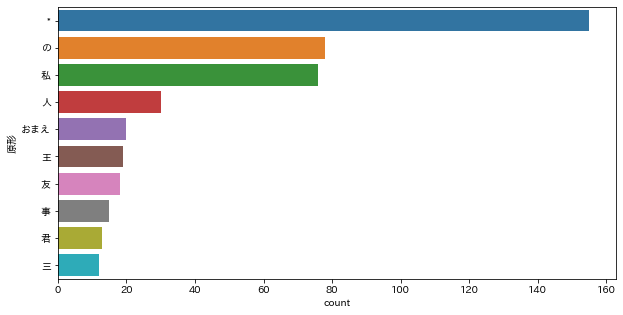

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib
plt.figure(figsize=(10,5))
sns.barplot(x=count['count'],y=count['原形'])

## ノック５９：単語の傾向をWordCloudで可視化してみよう

## ノック６０：n-gramを作ってみよう